# Ejecución de Código

## Requisitos a Instalar

In [1]:
# Requisitos que hay que instalar
import Cython,matplotlib,numpy,cv2,yaml,PIL,scipy,tensorboard,torch,torchvision,tqdm
from pycocotools import coco
print("matplotlib", matplotlib.__version__) # matplotlib>=3.2.2
print("numpy", numpy.__version__) # numpy>=1.18.5
print("opencv-python", cv2.__version__) # opencv-python>=4.1.2
print("pillow", PIL.__version__) # pillow
print("pycocotools", coco.__version__) # pycocotools>=2.0
print("PyYAML", yaml.__version__) # PyYAML>=5.3
print("scipy", scipy.__version__) # scipy>=1.4.1
print("tensorboard", tensorboard.__version__) # tensorboard>=2.2
print("torch", torch.__version__) # torch>=1.6.0
print("torchvision", torchvision.__version__) # torchvision>=0.7.0
print("tqdm", tqdm.__version__) # tqdm>=4.41.0

matplotlib 3.3.0
numpy 1.19.1
opencv-python 4.3.0
pillow 7.1.2
pycocotools 2.0
PyYAML 5.3.1
scipy 1.4.1
tensorboard 2.3.0
torch 1.6.0
torchvision 0.7.0
tqdm 4.48.0


## Construir DataSet

In [2]:
!gdown --id 1uWdQ2kn25RSQITtBHa9_zayplm27IXNC

Downloading...
From: https://drive.google.com/uc?id=1uWdQ2kn25RSQITtBHa9_zayplm27IXNC
To: D:\Code\python\epi\trabajo\clothing.json

  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 372kB/s]
100%|##########| 199k/199k [00:00<00:00, 371kB/s]


In [3]:
# Importando librerias

from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10

np.random.seed(42)

In [33]:
clothing = []
with open("clothing.json") as f:
    for line in f:
        clothing.append(json.loads(line))

In [34]:
len(clothing)

504

In [54]:
clothing[355]

{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/4bb8fd9d-8d52-46c7-aa2a-9c18af10aed6___Data_xxl-top-4437-jolliy-original-imaekasxahykhd3t.jpeg',
 'annotation': [{'label': ['Tops'],
   'notes': '',
   'points': [{'x': 0.02040816326530612, 'y': 0.2532051282051282},
    {'x': 0.9931972789115646, 'y': 0.8108974358974359}],
   'imageWidth': 147,
   'imageHeight': 312}],
 'extras': None}

In [36]:
for c in clothing:
    if len(c["annotation"]) > 1:
        display(c)

In [37]:
categories = []

for c in clothing:
    for a in c["annotation"]:
        categories.extend(a["label"])

categories = list(set(categories))
categories

['Shoes',
 'sunglasses',
 'Skirts',
 'Jeans',
 'Tops',
 'Shirts',
 'Tshirts',
 'Jackets',
 'Trousers']

In [38]:
len(categories)

9

In [39]:
train_clothing, val_clothing = traing, val_clothing = train_test_split(clothing, test_size=0.1)

In [40]:
len(train_clothing), len(val_clothing)

(453, 51)

In [55]:
train_clothing[0]

{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/a923c37e-4f20-420f-946c-bf993e8c4245___Data_m-vhjk516m09541blue-van-heusen-original-imaf5a64zhe4gxds.jpeg',
 'annotation': [{'label': ['Jackets'],
   'notes': '',
   'points': [{'x': 0.05952380952380952, 'y': 0.20833333333333334},
    {'x': 1, 'y': 0.8108974358974359}],
   'imageWidth': 168,
   'imageHeight': 312}],
 'extras': None}

In [42]:
row = train_clothing[355]
row

{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/809b7d24-9031-4faf-ad74-66b83ddc7c4a___Data_xl-rt021-leana-original-imafyguj4gfp6sey.jpeg',
 'annotation': [{'label': ['Tshirts'],
   'notes': '',
   'points': [{'x': 0.019867549668874173, 'y': 0.20512820512820512},
    {'x': 1, 'y': 0.8397435897435898}],
   'imageWidth': 151,
   'imageHeight': 312}],
 'extras': None}

In [43]:
img = urllib.request.urlopen(row["content"])
img = Image.open(img)
img = img.convert("RGB")
img.save("demo_image.jpg", "JPEG")

In [44]:
img = cv2.cvtColor(cv2.imread("demo_image.jpg"), cv2.COLOR_BGR2RGB)

In [45]:
img.shape

(312, 151, 3)

In [46]:
for a in row["annotation"]:
    print(a)

{'label': ['Tshirts'], 'notes': '', 'points': [{'x': 0.019867549668874173, 'y': 0.20512820512820512}, {'x': 1, 'y': 0.8397435897435898}], 'imageWidth': 151, 'imageHeight': 312}


In [47]:
for a in row["annotation"]:
    for label in a["label"]:
        
        w = a["imageWidth"]
        h = a["imageHeight"]
        
        points = a["points"]
        p1, p2 = points
        
        x1, y1 = p1["x"] * w, p1["y"] * h
        x2, y2 = p2["x"] * w, p2["y"] * h
        
        cv2.rectangle(
            img,
            (int(x1), int(y1)),
            (int(x2), int(y2)),
            color = (0,255,0),
            thickness = 2
        )
       
        ((label_width, label_height), _) = cv2.getTextSize(
            label,
            fontFace = cv2.FONT_HERSHEY_PLAIN,
            fontScale = 1.75,
            thickness = 2
        )
        
        cv2.rectangle(
            img,
            (int(x1), int(y1)),
            (int(x1 + label_width + label_width * 0.05), 
             int(y1 + label_height + label_height * 0.05)),
            color = (0,255,0),
            thickness = cv2.FILLED
        )
        
        cv2.putText(
            img,
            label,
            org = (int(x1), int(y1 + label_height + label_height * 0.05)), # En la parte de abajo izquierda  del texto
            fontFace = cv2.FONT_HERSHEY_PLAIN,
            fontScale = 1.75, 
            color = (255,255,255),
            thickness = 2
        )

(-0.5, 150.5, 311.5, -0.5)

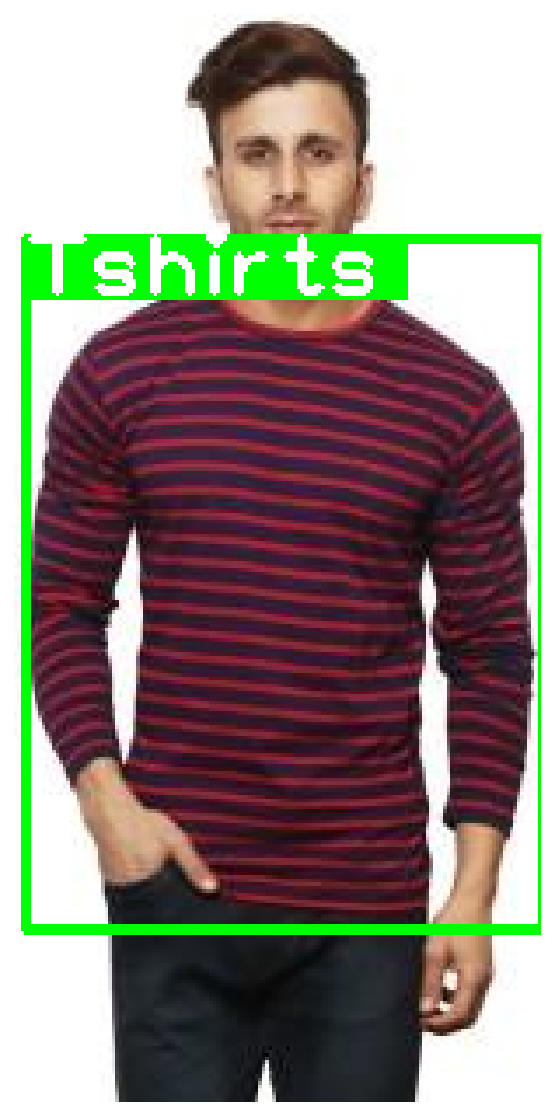

In [48]:
plt.imshow(img)
plt.axis("off")

In [18]:
#img = cv2.cvtColor(cv2.imread("demo_image.jpg"), cv2.COLOR_BGR2RGB)

In [49]:
def create_dataset(clothing, dataset_type):
    
    images_path = Path(f"clothing/images/{dataset_type}")
    images_path.mkdir(parents = True, exist_ok = True)
    
    labels_path = Path(f"clothing/labels/{dataset_type}")
    labels_path.mkdir(parents = True, exist_ok = True)
    
    for img_id, row in enumerate(tqdm(clothing)):
        
        image_name = f"{img_id}.jpg"
        
        img = urllib.request.urlopen(row["content"])
        img = Image.open(img)
        img = img.convert("RGB")
        
        img.save(str(images_path / image_name), "JPEG")
        
        label_name = f"{img_id}.txt"
        
        with (labels_path / label_name).open(mode = "w") as label_file:
            
            for a in row["annotation"]:
                
                for label in a["label"]:
                    
                    category_idx = categories.index(label)
                    
                    points = a["points"]
                    p1, p2 = points
                    
                    x1, y1 = p1["x"], p1["y"]
                    x2, y2 = p2["x"], p2["y"]
                    
                    bbox_width = x2 - x1
                    bbox_height = y2 - y1
                    
                    label_file.write(
                        f"{category_idx} {x1 + bbox_width / 2} {y1 + bbox_height / 2} {bbox_width} {bbox_height}"
                    )
                    

In [50]:
create_dataset(train_clothing, "train")
create_dataset(val_clothing, "val")

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:16<00:00,  3.08it/s]


In [51]:
clothing[355]

{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/cb7c3b93-2ddc-4c8f-a8f9-6082cabe1a52___Data_41U2jN3MQSL._AC_UL260_SR200260_.jpg.jpeg',
 'annotation': [{'label': ['Jeans'],
   'notes': '',
   'points': [{'x': 0.265, 'y': 0.019230769230769232},
    {'x': 0.7, 'y': 0.8769230769230769}],
   'imageWidth': 200,
   'imageHeight': 260}],
 'extras': None}

In [52]:
!dir clothing

 El volumen de la unidad D es DATA
 El n£mero de serie del volumen es: C034-56CE

 Directorio de D:\Code\python\epi\trabajo\clothing

11/08/2020  05:43    <DIR>          .
11/08/2020  05:43    <DIR>          ..
11/08/2020  05:45    <DIR>          images
11/08/2020  05:45    <DIR>          labels
               0 archivos              0 bytes
               4 dirs  291,151,945,728 bytes libres


In [53]:
!more .\clothing\labels\train\0.txt

7 0.5297619047619048 0.5096153846153846 0.9404761904761905 0.6025641025641025


In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
#!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f

D:\Code\python\epi\trabajo\yolov5


Cloning into 'yolov5'...


In [56]:
%cd yolov5

D:\Code\python\epi\trabajo\yolov5


In [2]:
!gdown --id 1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO -O data/clothing.yaml
!gdown --id 1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i -O models/yolov5x.yaml

Downloading...
From: https://drive.google.com/uc?id=1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO
To: D:\Code\python\epi\trabajo\yolov5\data\clothing.yaml

  0%|          | 0.00/172 [00:00<?, ?B/s]
100%|##########| 172/172 [00:00<?, ?B/s] 
Downloading...
From: https://drive.google.com/uc?id=1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i
To: D:\Code\python\epi\trabajo\yolov5\models\yolov5x.yaml

  0%|          | 0.00/1.58k [00:00<?, ?B/s]
100%|##########| 1.58k/1.58k [00:00<00:00, 1.53MB/s]


In [ ]:
!python train.py --img 640 --batch 4 --epochs 30 \
  --data ./data/clothing.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt \
  --name yolov5x_clothing --cache-images \
  --local_rank -2